# HW 6

In this exercise, we will use the digits dataset which contains hand written digits in 8x8 grayscale images.<br>
The following 3 cells are:
* importing all needed modules
* loading of the data set to a matrix X and a vector y
* defining a function for plotting digits

In [17]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from scipy.stats import mode
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

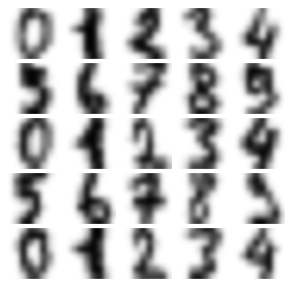

In [19]:
def plot_digits(data, rows=5, columns=5) -> None:
    """
    plots the first rows*columns digits in the data.
    """
    fig, ax = plt.subplots(rows, columns, figsize=(rows, columns),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary', interpolation="Gaussian")
        im.set_clim(0, 16)

#Usage example
plot_digits(X, 5, 5)

# Q1 
In previous lecture, we used PCA to reduce the dimensionlity such that 99% of the variance is explained. <br>
Then we used GMM to model it, and sample new digits.

In this question you need to:
1. reduce the dimensionaly to cover 95% of the variance in the data (you can set n_samples to 0.95 to do this automaticaly)
2. print the number of dimensions selected by the PCA.
3. Fit a KDE model (imported above) to the reduced dimensionality dataset. <br>
    The `bandwidth` parameter should be selected by 5-fold cross validation out of `bandwith_values`. <br>
    using GridSearchCV is recommended but not mandatory.
4. Print the selcted bandwidth.
3. sample 100 new digits out of the kde probability distribution and plot them.

In [20]:
bandwidth_values = np.logspace(-1, 1, 20)

### 1+2. reduce dimensionality to cover 95% of variance and print number of dimensions

In [21]:
var_precet  = 0.95
transformer = PCA(n_components=var_precet, whiten=True)
X_trans = transformer.fit_transform(X)


n_of_dim = X_trans.shape[1]
print(f"number of dimensions: {n_of_dim}")

number of dimensions: 29


### 3+4. fit KDE model with best bandwidth paramater and print selected bandwidth

In [22]:
kde = KernelDensity()
cross_valudation = GridSearchCV(estimator=kde, param_grid={'bandwidth': bandwidth_values})
cross_valudation.fit(X_trans)
best_bw = cross_valudation.best_estimator_.bandwidth
print(f"bandwidth selcted : {best_bw}")

bandwidth selcted : 0.6951927961775606


### 5. plot 100 digits sampled from kde distribution

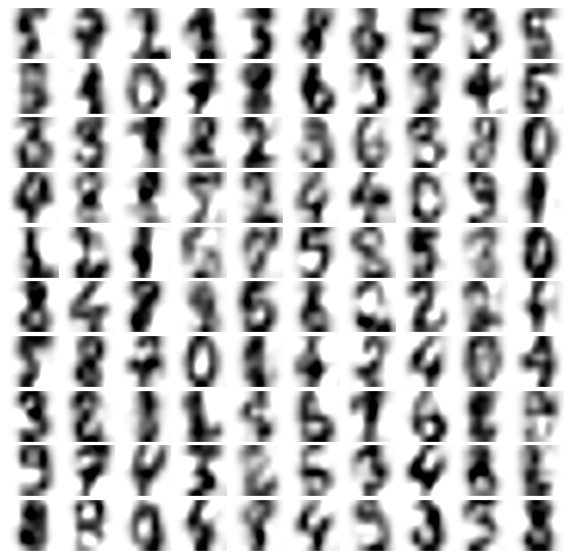

In [23]:
genereated_digits = cross_valudation.best_estimator_.sample(100)
plot_digits(transformer.inverse_transform(genereated_digits), 10, 10)

# Q2
The following code reduces the data of part of the digits to 2 dimensions with PCA, and plots it.

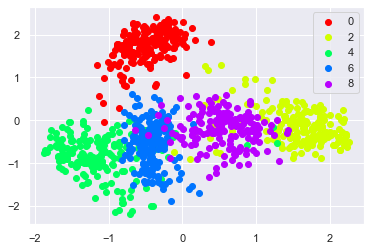

In [24]:
pca = PCA(n_components=2, whiten=True)
selected_digits = [0,2,4,6,8]
digits_partial = digits.data[np.isin(digits.target,selected_digits),:]
labels_partial = digits.target[np.isin(digits.target,selected_digits)]
data_reduced = pca.fit_transform(digits_partial)
colors = plt.cm.get_cmap('hsv', len(selected_digits)+1)
for digit in selected_digits:
    plt.scatter(data_reduced[digit==labels_partial,0],data_reduced[digit==labels_partial,1], 
                color=colors(selected_digits.index(digit)), label=digit)
plt.legend()
plt.show()

Though clustering is an unsupervised method, we sometimes apply "supervised" metrices to measure the success of an algorithm. Especially in competitions.
In this exercise, as done in the lecture, we shall have each cluster to generate a prediction, based on its majority vote. <br><br>
Use which clustering method you see fit to cluster "data_reduced" the best way you see fit.<br>
You don't have to limit yourself to 5 clusters. <br><br>
After you select a clustering method and apply it you should plot the results on the train and validation sets using `plot_clustes_and_get_score()`: <br></br>
1. Find the best clustering method in your opinion (clustering algortihm, number of clusters, algorithm parameters etc.) **using only the train set**.
2. Show your clustering method performence on the test set. you need to get at least 0.8 accuracy score on the test set. 
<br><br>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_reduced,labels_partial,
                                                    test_size = 0.4,
                                                    random_state= 42, 
                                                    shuffle=True)

In [26]:
def plot_clustes_and_get_score(clusters: np.array, data: np.array, labels: np.array, to_plot = True) -> float:
    """
    Plot the clusters and true labels, given data points and cluster for each point. Then calculate accuracy, by assigning each point the majority class of its cluster
    clusters: 1D np.array representing the cluster each point belongs to
    data: 2D np.array representing the point features. Set by default to be data_reduced
    labels: 1D np.array representing the real class (digit) of each point
    to_plot: boolean flag to indicate whether to plot or not
    """

    digit_labels = np.zeros_like(clusters) # 1D array of zeros
    clusters_num = np.unique(clusters).shape[0]
    for i in range(clusters_num):
        mask = (clusters == i)
        common_label_out_of_cluster = mode(labels[mask])[0]
        digit_labels[mask] = common_label_out_of_cluster

    if to_plot:
        sns.scatterplot(x=data[:,0],
                        y=data[:,1],
                        hue = labels,
                        palette = 'Spectral').set_title('True Label')
        plt.show()
        sns.scatterplot(x=data[:,0],
                    y=data[:,1],
                    hue = clusters,
                    palette = 'Spectral',
                    legend=False).set_title('Clusters')
        plt.show()
        
    return accuracy_score(labels,digit_labels)

Example for using function above

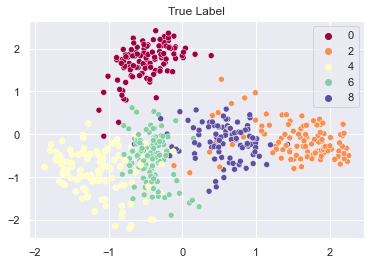

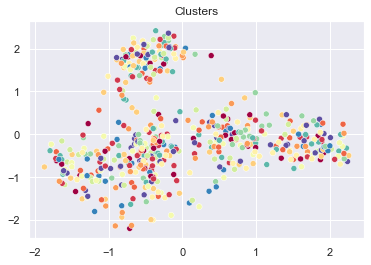

Random clustering accuracy: 0.26779026217228463


In [27]:
# Intsed of using a clustering method, we will assign a random cluster to each sample for the example.
num_clusters = 12
clusters = np.random.randint(0,num_clusters,size=y_train.shape[0])

cluster_acc = plot_clustes_and_get_score(clusters, X_train, y_train)
print(f'Random clustering accuracy: {cluster_acc}')

In [30]:
clusters

array([ 4,  4, 10,  8, 10,  7,  4,  5,  6,  1,  8,  7,  2,  0,  2, 11, 10,
        2, 10,  3, 10,  6,  5, 10,  1, 11,  5,  0, 11, 11,  3,  4,  2,  4,
        5, 10,  0,  9,  6,  7,  7,  9,  6,  1,  8,  0, 10,  8,  9, 11, 10,
       11,  7,  3,  3,  7,  2,  6,  1,  4,  7,  2,  9,  0,  9,  5,  5,  4,
        2,  0,  9,  1,  4,  3, 11,  0,  6,  3, 11,  3,  7,  2,  4, 10,  4,
        9,  8,  8,  7,  3,  6,  4,  2,  4,  0,  3,  9,  7,  2, 10,  1,  4,
        4,  7,  4,  5,  0,  6,  2,  0,  9,  7,  3,  6,  0,  1,  0,  8,  2,
       10,  9,  6,  1,  8,  5,  4,  7, 10,  2,  9,  2,  6,  1,  4,  6,  1,
        1,  3,  5,  1,  9,  4,  6,  5,  8,  6,  1,  8,  4,  1,  8,  7,  1,
        7,  5,  4, 10,  4, 10, 10,  1, 11,  8,  7,  8,  4,  2,  0, 11,  8,
        8,  5,  9,  2,  9,  6,  4,  6,  1,  1,  2,  9,  7,  1,  7,  6,  7,
        7,  5,  7,  7,  8, 10, 11, 10, 10,  5,  1,  6,  1,  0,  0,  3,  7,
        5, 11,  4,  2,  6,  2,  1, 11,  4,  2, 10,  1,  4, 11,  9,  2,  2,
        1,  1, 11,  4,  7

# chosen model: GMM

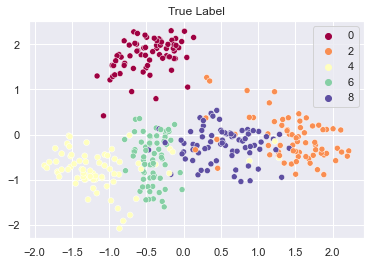

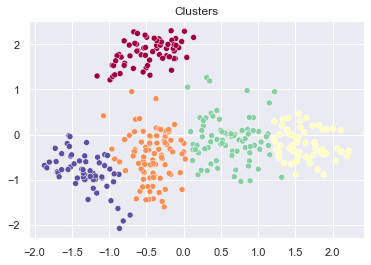

Random clustering accuracy: 0.8683473389355743


In [35]:
from sklearn.mixture import GaussianMixture
# from sklearn.cluster import 
model = GaussianMixture(n_components=5, random_state=0).fit(X_train)
result = model.predict_proba(X_test)

clusters = []
for test_case in result:
    clusters.append(np.argmax(test_case))
clusters = np.array(clusters)

cluster_acc = plot_clustes_and_get_score(clusters, X_test, y_test)
print(f'Random clustering accuracy: {cluster_acc}')